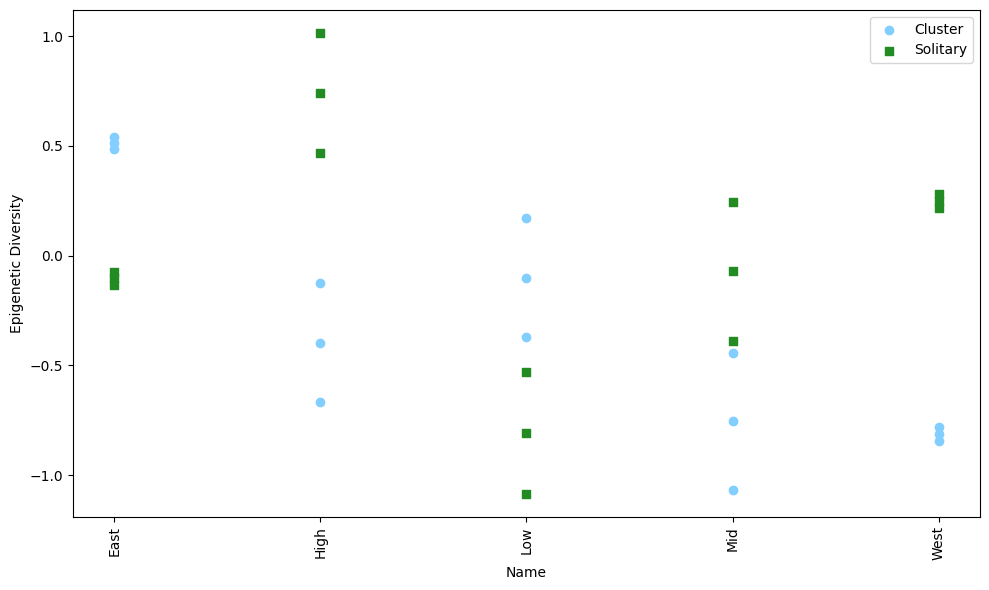

<Figure size 640x480 with 0 Axes>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
file_path = '/Users/supantha/Downloads/mec15689-sup-0002-tables1-s7.xlsx'
sheet_name = 'Sheet3'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Function to split comma-separated values and extract x, y components safely
def extract_values(cell_value):
    values = cell_value.split(',')
    if len(values) >= 2:
        return float(values[0]), float(values[1])
    else:
        return None, None

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for idx, row in df.iterrows():  # Iterate over rows
    x_label = row[df.columns[0]]  # X-axis label from the first column of the row
    for col_name, cell_value in row[df.columns[1]:].items():  # Iterate over columns (excluding the first column)
        x_val, y_val = extract_values(cell_value)  # Extract x and y values safely
        if x_val is not None and y_val is not None:
            ax.scatter(x_label, x_val, marker='o', color='#82cfff')
            ax.scatter(x_label, y_val, marker='s', color='#228b22')

# Customize plot
ax.set_xlabel(df.columns[0])  # Set x-axis label from the first column name
ax.set_ylabel('Epigenetic Diversity')
ax.legend(['Cluster', 'Solitary'])

# Show plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.savefig('Fig5_edited.png')
